In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../resources/MY2022 Fuel Consumption Ratings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [3]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [4]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In the data processing process, the model year, fuel usage (city, highway, mpg), model name, and smog rating are excluded because they are unused features.

In [5]:
df_sort = df[df.columns.drop(['Model Year','Fuel Consumption (City (L/100 km)', 
            'Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))', 'Model', 'Smog Rating'])]
            
df_sort.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating
0,Acura,Compact,2.4,4,AM8,Z,8.6,200,6
1,Acura,SUV: Small,3.5,6,AS10,Z,11.2,263,4
2,Acura,SUV: Small,2.0,4,AS10,Z,9.9,232,5
3,Acura,SUV: Small,2.0,4,AS10,Z,10.3,242,5
4,Acura,Compact,2.0,4,AS10,Z,9.8,230,5


Use the OrdinalEncoder to encode the brand name, car class, fuel type, and transmission numerically. 
Since the data are object types, the OrdinalEncoder operates similarly to the label encoder in the data processing process, but the method is adopted because it is used effectively in a two-dimensional array.
* Warning occurs because the error in the bottom result affects the conversion of existing data while copying. However, in the case of the preprocessing, it is okay to ignore the warning because the original is also modified. Therefore, the result of output after the encoding process is the dataframe after classification.

In [6]:
z = df_sort[['Make','Vehicle Class', 'Transmission', 'Fuel Type']]

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
z = enc.fit_transform(z)
z_res = pd.DataFrame(z)
df_sort[['Make','Vehicle Class', 'Transmission', 'Fuel Type']] = z_res
df_sort

C:\Users\User1\AppData\Local\Temp\ipykernel_2272\226076172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort[['Make','Vehicle Class', 'Transmission', 'Fuel Type']] = z_res


,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating
0,0.0,0.0,2.4,4,7.0,3.0,8.6,200,6
1,0.0,7.0,3.5,6,8.0,3.0,11.2,263,4
2,0.0,7.0,2.0,4,8.0,3.0,9.9,232,5
3,0.0,7.0,2.0,4,8.0,3.0,10.3,242,5
4,0.0,0.0,2.0,4,8.0,3.0,9.8,230,5
...,...,...,...,...,...,...,...,...,...
941,38.0,7.0,2.0,4,12.0,3.0,9.4,219,5
942,38.0,7.0,2.0,4,12.0,3.0,9.4,219,5
943,38.0,7.0,2.0,4,12.0,3.0,9.9,232,5
944,38.0,8.0,2.0,4,12.0,3.0,10.1,236,5


Data are divided into feature data, encoding data, and targets.

In [7]:
df_num = df_sort[['Engine Size(L)', 'Cylinders', 
                 'Fuel Consumption(Comb (L/100 km))']]
df_cat = df_sort[['Make', 'Vehicle Class', 'Fuel Type', 'Transmission']]
df_rate = df_sort[['CO2 Emissions(g/km)', 'CO2 Rating']]
df_rate

,CO2 Emissions(g/km),CO2 Rating
0,200,6
1,263,4
2,232,5
3,242,5
4,230,5
...,...,...
941,219,5
942,219,5
943,232,5
944,236,5


Normalization is carried out using StandardScaler. This is because it is easy to respond to outliers and is commonly used data.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num)
df_scaled = scaler.transform(df_num)
df_scaled_df = pd.DataFrame(df_scaled, columns=['Engine Size(L)', 'Cylinders', 
                 'Fuel Consumption(Comb (L/100 km))'])
df_scaled_df



,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km))
0,-0.581281,-0.863551,-0.866881
1,0.219250,0.171835,0.037543
2,-0.872384,-0.863551,-0.414669
3,-0.872384,-0.863551,-0.275527
4,-0.872384,-0.863551,-0.449455
...,...,...,...
941,-0.872384,-0.863551,-0.588597
942,-0.872384,-0.863551,-0.588597
943,-0.872384,-0.863551,-0.414669
944,-0.872384,-0.863551,-0.345098


In [9]:
df_result_sum = pd.concat([df_scaled_df, df_cat], axis = 1)
df_result_sum.loc[[10,11,12],:]

,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),Make,Vehicle Class,Fuel Type,Transmission
10,-0.217404,0.171835,0.176686,1.0,2.0,3.0,3.0
11,-0.872384,-0.863551,-0.623382,1.0,7.0,3.0,3.0
12,-0.872384,-0.863551,-0.519026,1.0,7.0,3.0,3.0


In the area, about train and test x train y, of the overall column train that CO2, 02 rating c emissions (km and g) as divided into two case.
Train_1 represents data on c02 ratin, and train_2 represents data on CO2 Emissions (g/km).

In [10]:
from sklearn.model_selection import train_test_split
target_co2_rating = df_rate.pop('CO2 Rating')
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_result_sum, target_co2_rating, 
                                                            test_size = 0.2, random_state = 0)

target_co2_emission = df_rate.pop('CO2 Emissions(g/km)')
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_result_sum, target_co2_emission, 
                                                            test_size = 0.2, random_state = 0)

In [11]:
print(X_train_1.shape)
print(y_train_1.shape)
print(X_test_1.shape)
print(y_test_1.shape)

print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)
X_train_2

(756, 7)
(756,)
(190, 7)
(190,)
(756, 7)
(756,)
(190, 7)
(190,)


,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),Make,Vehicle Class,Fuel Type,Transmission
79,0.874230,1.207220,0.315828,4.0,1.0,3.0,12.0
687,-0.144628,0.171835,-0.240741,29.0,8.0,3.0,4.0
181,2.184190,1.207220,1.324609,9.0,12.0,3.0,21.0
744,-1.163486,-0.863551,-1.527807,31.0,0.0,2.0,14.0
215,1.529210,1.207220,1.150682,9.0,6.0,2.0,0.0
...,...,...,...,...,...,...,...
835,1.820312,1.207220,0.907183,33.0,6.0,2.0,3.0
192,-1.236261,-0.863551,-0.797310,9.0,7.0,2.0,1.0
629,0.437577,1.207220,1.324609,27.0,1.0,3.0,3.0
559,1.456434,2.242605,1.602894,22.0,13.0,3.0,6.0


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

Specify independent variables necessary for prediction, and specify training and test X from which independent variables are extracted.

In [13]:
columns = ['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission','Fuel Type', 'Fuel Consumption(Comb (L/100 km))']

X_reg_train_data = X_train_2[columns]
X_reg_test_data = X_test_2[columns]

After creating a Polynomial Regression model and learning with the values of training x and y, 
the model and predictions are returned by making predictions with test X.

(Reference: https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-function)

In [14]:
def predict_poly_regression(train_X, train_y, test_X, deg):
    regression_model = Pipeline([('poly', PolynomialFeatures(degree=deg)),
                        ('linear', LinearRegression(fit_intercept=False))])

    regression_model = regression_model.fit(train_X, train_y)
    predicted_co2 = regression_model.predict(test_X)
    return regression_model, predicted_co2

From the 2 to the 10 degree, the regression model is predicted, 
and the R square adj value is calculated to return the degree with the largest R square adj value.

(Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
            https://stackoverflow.com/questions/49381661/how-do-i-calculate-the-adjusted-r-squared-score-using-scikit-learn)

In [15]:
def get_degree(train_X, train_y, test_X, test_Y):
    max_r2_adj = 0
    max_degree_r2_adj = 0
    for deg in range(2, 11):
        regression_model, predicted_co2 = predict_poly_regression(train_X, train_y, test_X, deg)
        r_score = r2_score(test_Y, predicted_co2)
        n = len(test_Y)
        r2_adj = 1 - (1 - r_score) * (n - 1) / (n - len(columns) - 1)
        
        if max_r2_adj < r2_adj:
            max_r2_adj = r2_adj
            max_degree_r2_adj = deg
            
    return max_degree_r2_adj

Find the optimal degree, and print the predicted value with optimal degree.

In [16]:
deg = get_degree(X_reg_train_data, y_train_2, X_reg_test_data, y_test_2)
print("Degree: {0}".format(deg))
regression_model, predicted_co2 = predict_poly_regression(X_reg_train_data, y_train_2, X_reg_test_data, deg)
print(predicted_co2)

Degree: 3
[177.75849119 192.97859878 255.33816734 249.40485919 282.05239789
 451.54833099 321.69231046 342.05755006 269.40592332 215.92856617
 154.16512046 269.8831686  268.2972406  230.47807774 281.69515369
 326.10605324 283.71421791  94.06819898 215.73503981 169.7234616
 335.88051347 209.38366835 289.98551675 272.5341483  280.89434299
 265.288453   208.6927126  300.94595459 273.33998673 298.31979548
 348.55878649 275.07584531 166.05105712 281.69515369 322.11122969
 144.36184948 214.45895617 166.196707   269.37299755 258.2201446
 182.66566055 136.01722043 298.53889372 329.28929864 249.40485919
 211.04495211 231.02400315 213.02293934 266.77696652 252.98212518
 259.69514865 244.66717323 353.84817382 315.24731    352.12066591
 283.26565136 284.58401826 262.90498873 286.68071866 322.73203904
 179.1520181  378.55540703 323.06811082 253.78152984 240.52384347
 117.60525793 211.87798923 297.66196918 221.60722705 229.23001297
 377.90707728 174.76719818 289.87792283 187.13010062 189.99589491
 1

If we reduce the feature of X to one using PCA to represent it as a two-dimensional diagram, we will get an unexplained result.
(Reference: Lecture materials - preprocessing-3 (p.33))

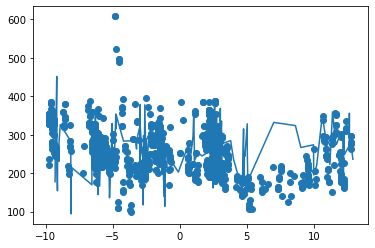

In [17]:
pca = PCA(n_components=1)
pca_test_X = pca.fit_transform(X_reg_test_data)
pca_test_X = np.array(pca_test_X).ravel()
pca_test_X.sort()
pca_train_X = pca.fit_transform(X_reg_train_data)

plt.scatter(pca_train_X, y_train_2)
plt.plot(pca_test_X, predicted_co2)


---10 k fold 정확도---
교차 검증별 정확도 : [0.99887888 0.99815579 0.99931724 0.99861048 0.99905099 0.99784782
 0.99926598 0.99921638 0.99892981 0.99914857]

평균 검증 정확도 : 0.999


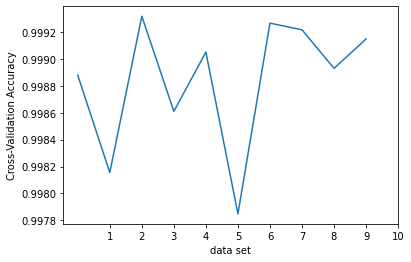

In [18]:
# import library
from sklearn.model_selection import KFold # k fold
from sklearn.model_selection import cross_val_score  # k fold Api

features = df_result_sum[columns] # set col names (scaled)
target_co2_rating = df['CO2 Emissions(g/km)'] # label to predit

#n_splits : 데이터 셋 분할 수  shuffle : 데이터셋 랜덤 섞음 유무  
#random_state : 임의의 난수, 다른 함수에서 random_state가 같은 값일시 동일하게 섞어준다.
kfold = KFold(n_splits=10, shuffle=True ,random_state=0)

#cross_val_score : k fold 간편하게 해주는 api
#model, feature, target, k fold setting
scores = cross_val_score(regression_model, features, target_co2_rating, cv=kfold)


print("---10 k fold 정확도---")
print("교차 검증별 정확도 : " + '{}'.format(scores))
print("\n평균 검증 정확도 : " + '{:.3f}'.format(scores.mean()))

x = np.arange(0, 10)

plt.plot(x, scores)
plt.xlabel('data set')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 11))
plt.show()








---k fold에서 k 횟수별 데이터셋 평균 검증 정확도---
[k=2] : 평균 검증 정확도 : 0.999
[k=3] : 평균 검증 정확도 : 0.998
[k=4] : 평균 검증 정확도 : 0.998
[k=5] : 평균 검증 정확도 : 0.998
[k=6] : 평균 검증 정확도 : 0.999
[k=7] : 평균 검증 정확도 : 0.999
[k=8] : 평균 검증 정확도 : 0.999
[k=9] : 평균 검증 정확도 : 0.999
[k=10] : 평균 검증 정확도 : 0.999
[k=11] : 평균 검증 정확도 : 0.999
[k=12] : 평균 검증 정확도 : 0.999
[k=13] : 평균 검증 정확도 : 0.999
[k=14] : 평균 검증 정확도 : 0.999
[k=15] : 평균 검증 정확도 : 0.999
[k=16] : 평균 검증 정확도 : 0.999
[k=17] : 평균 검증 정확도 : 0.999
[k=18] : 평균 검증 정확도 : 0.999
[k=19] : 평균 검증 정확도 : 0.999
[k=20] : 평균 검증 정확도 : 0.999


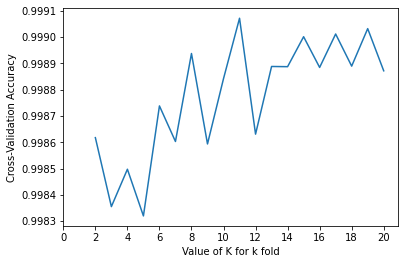

In [19]:
print("\n---k fold에서 k 횟수별 데이터셋 평균 검증 정확도---")
#k 데이터셋 별 평균 검증 정확도
k_range = range(2,21)
k_scores = []      
for k in k_range :
    kfold = KFold(n_splits=k, shuffle=True ,random_state=0)
    scores = cross_val_score(regression_model, features, target_co2_rating, cv=kfold)
    print("[k=" + str(k) +"] : " + "평균 검증 정확도 : " + '{:.3f}'.format(scores.mean()))
    k_scores.append(scores.mean()) 
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for k fold')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks([0, 2, 4, 6 ,8 ,10 ,12 ,14, 16, 18, 20])
plt.show()